In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

#The dataset to develop this work, has 444700 rows, and 6 columns related to the traffic crashes.
#The data analysis is focus on some statistics and relationships among the considered variables
#The part 1, considers the analysis of the number of traffic crashes vs the road conditions
#and speed limits.

#PART 1

datatoload = "data_traffic_crashes.csv"
datawork = pd.read_csv(datatoload)

datawork


,speedlimit,devicecondic,lightingcondic,crashtype,roadway,roaddefect
0,10,NO CONTROLS,DARKNESS,PARKED MOTOR VEHICLE,DRY,NO DEFECTS
1,45,NO CONTROLS,DAYLIGHT,SIDESWIPE SAME DIRECTION,DRY,NO DEFECTS
2,35,FUNCTIONING PROPERLY,DAYLIGHT,TURNING,DRY,NO DEFECTS
3,30,FUNCTIONING PROPERLY,DARKNESS LIGHTED ROAD,TURNING,DRY,NO DEFECTS
4,35,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,DRY,NO DEFECTS
...,...,...,...,...,...,...
444695,30,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,DRY,NO DEFECTS
444696,30,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,DRY,NO DEFECTS
444697,30,FUNCTIONING PROPERLY,DAYLIGHT,REAR END,DRY,NO DEFECTS
444698,30,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,DRY,NO DEFECTS


In [5]:
#Let us count the number of traffic crashes for each roadway conditions and show the respective percentages.

totalcr = datawork["roadway"].count()
report = datawork.groupby("roadway")
total = report["roadway"].count()
percent = total / totalcr * 100
df = pd.DataFrame({"total crashes": total, "percentage": percent})
df.index.name = None
df["percentage"] = df["percentage"].map("{:.2f}%".format)
df


,total crashes,percentage
DRY,334941,75.32%
ICE,3405,0.77%
OTHER,1019,0.23%
"SAND, MUD, DIRT",205,0.05%
SNOW OR SLUSH,14941,3.36%
UNKNOWN,29125,6.55%
WET,61064,13.73%


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

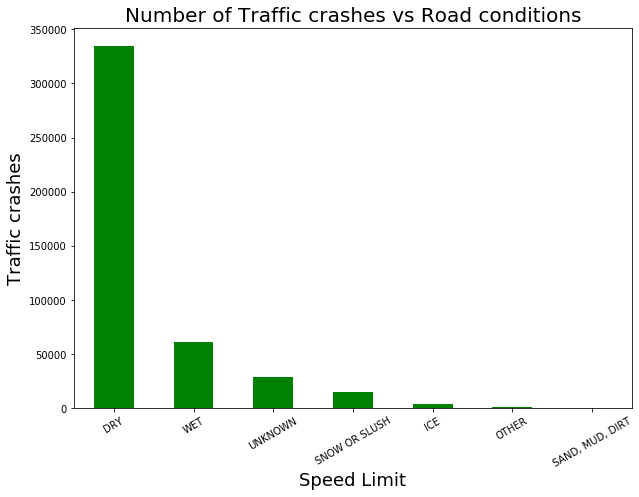

In [6]:
#This is about the number of traffic crashes occurred in each road condition, into a bar graph.
#datawork["roadway"].value_counts().unique ; in case it is needed

datawork["roadway"].value_counts().plot(kind = 'bar', color = 'green', figsize = (10,7))
plt.title("Number of Traffic crashes vs Road conditions", size = 20)
plt.xlabel('Speed Limit', size = 18)
plt.ylabel('Traffic crashes', size = 18)
plt.xticks(rotation = 30)


Text(0, 0.5, 'Traffic crashes')

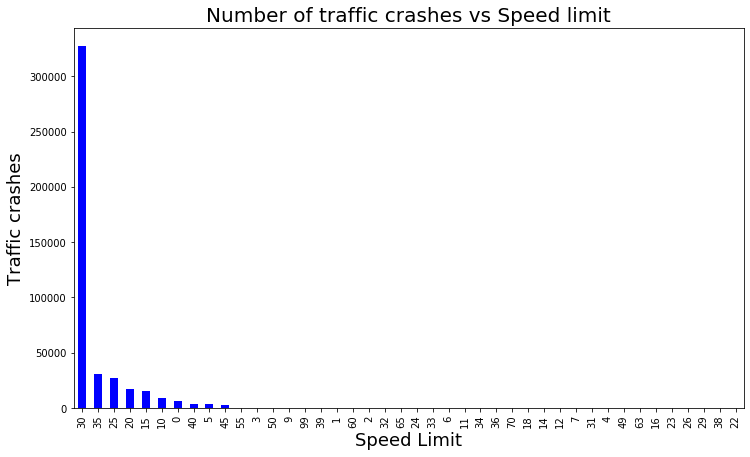

In [7]:
#This is about the number of traffic crashes occurred in each speed limit.
#datawork["speedlimit"].value_counts().unique ; in case it is needed

datawork["speedlimit"].value_counts().plot(kind = 'bar', color = 'blue', figsize = (12,7))
plt.title("Number of traffic crashes vs Speed limit", size = 20)
plt.xlabel('Speed Limit', size = 18)
plt.ylabel('Traffic crashes', size = 18)


Average speed limit for all accidents = 28.3


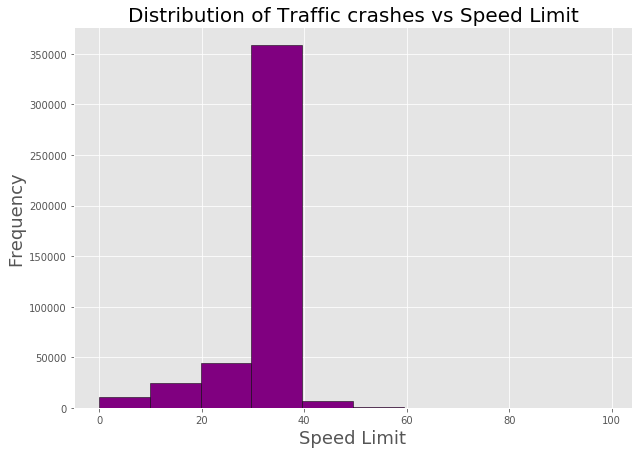

In [8]:
#Let us observe the frequency of traffic crashes by speed limit
# Histograms
average = datawork['speedlimit'].mean()
plt.style.use('ggplot')

# histogram of the speed limit

datawork.speedlimit.plot(kind = 'hist', color = 'purple', edgecolor = 'black', figsize = (10,7))
plt.title("Distribution of Traffic crashes vs Speed Limit", size = 20)
plt.xlabel('Speed Limit', size = 18)
plt.ylabel('Frequency', size = 18)

print(f"Average speed limit for all accidents = {round(average,1)}")


In [10]:
#Let us focus on road conditions and speed limits
#dataspeed = pd.DataFrame(datawork, columns = ["roadway", "speedlimit"]) ; in case it is needed
dataspeed = datawork[["roadway", "speedlimit"]]
dataspeed


,roadway,speedlimit
0,DRY,10
1,DRY,45
2,DRY,35
3,DRY,30
4,DRY,35
...,...,...
444695,DRY,30
444696,DRY,30
444697,DRY,30
444698,DRY,30


In [11]:
#This is about the traffic crashes only when the road is wet
subsetroadway = dataspeed[dataspeed['roadway'] == 'WET']
subsetroadway


,roadway,speedlimit
8,WET,25
9,WET,35
11,WET,30
15,WET,30
21,WET,30
...,...,...
444596,WET,30
444599,WET,30
444649,WET,30
444650,WET,25


Average speed limit for accidents when the Raod is wet = 28.9


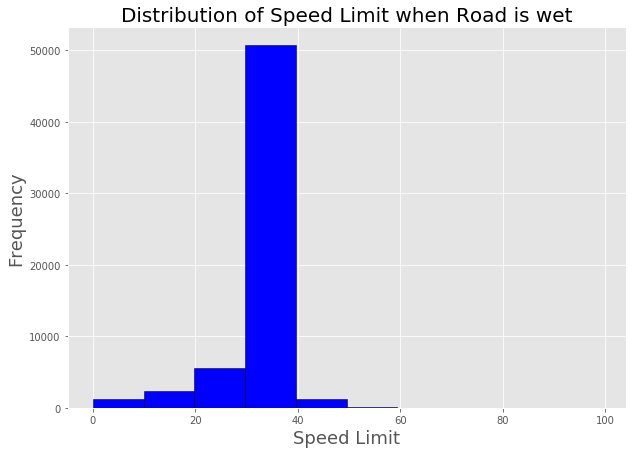

In [12]:
#Now let us observe the distribution of speed limit of traffic crashes only when the road is wet.
# Histograms
avg = subsetroadway['speedlimit'].mean()
plt.style.use('ggplot')

# histogram of the speed limit when road is wet

subsetroadway.speedlimit.plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title("Distribution of Speed Limit when Road is wet", size = 20)
plt.xlabel('Speed Limit', size = 18)
plt.ylabel('Frequency', size = 18)

print(f"Average speed limit for accidents when the Raod is wet = {round(avg,1)}")


In [13]:
#This is about the traffic crashes only when the road is dry.

subsetroadway2 = dataspeed[dataspeed['roadway'] == 'DRY']
subsetroadway2


,roadway,speedlimit
0,DRY,10
1,DRY,45
2,DRY,35
3,DRY,30
4,DRY,35
...,...,...
444695,DRY,30
444696,DRY,30
444697,DRY,30
444698,DRY,30


Average speed limit for accidents when the raod is dry = 28.3


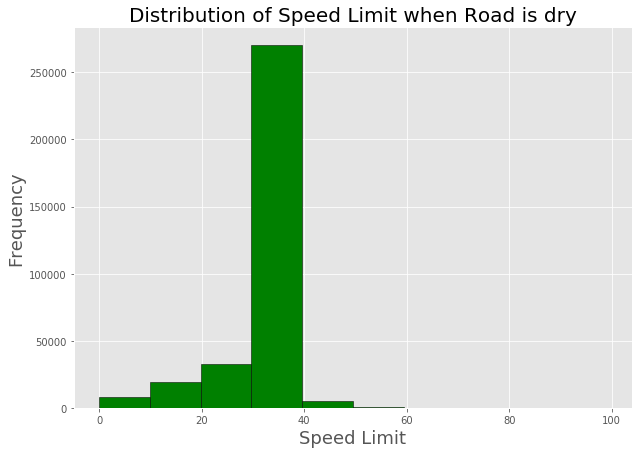

In [14]:
#Now let us observe the distribution of speed limit of traffic crashes only when the road is dry.
# Histograms
avg = subsetroadway2['speedlimit'].mean()
plt.style.use('ggplot')

# histogram of the speed limit when road is dry

subsetroadway2.speedlimit.plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title("Distribution of Speed Limit when Road is dry", size = 20)
plt.xlabel('Speed Limit', size = 18)
plt.ylabel('Frequency', size = 18)

print(f"Average speed limit for accidents when the raod is dry = {round(avg,1)}")


In [15]:
#This is about the traffic crashes only when the road is snow or slush.
subsetroadway3 = dataspeed[dataspeed['roadway'] == 'SNOW OR SLUSH']
subsetroadway3


,roadway,speedlimit
39,SNOW OR SLUSH,30
49,SNOW OR SLUSH,30
117,SNOW OR SLUSH,25
201,SNOW OR SLUSH,10
231,SNOW OR SLUSH,30
...,...,...
444390,SNOW OR SLUSH,30
444392,SNOW OR SLUSH,15
444399,SNOW OR SLUSH,30
444428,SNOW OR SLUSH,15


Average speed limit for accidents when the raod is snow or slush = 28.0


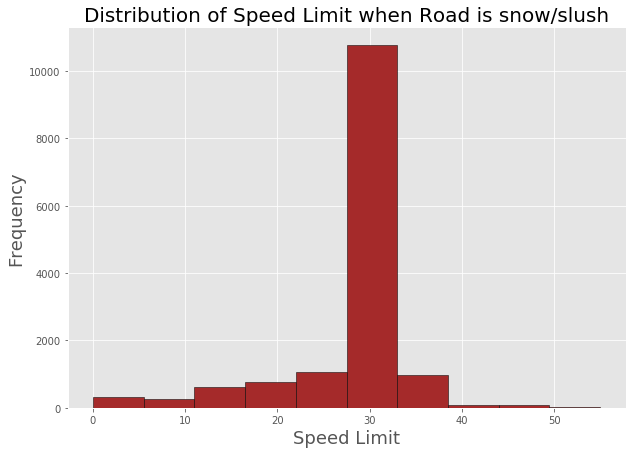

In [16]:
#Now let us observe the distribution of speed limit of traffic crashes only when the road is snow or slush.
# Histograms
avg = subsetroadway3['speedlimit'].mean()
plt.style.use('ggplot')

# histogram of the speed limit when road is snow or slush

subsetroadway3.speedlimit.plot(kind = 'hist', color = 'brown', edgecolor = 'black', figsize = (10,7))
plt.title("Distribution of Speed Limit when Road is snow/slush", size = 20)
plt.xlabel('Speed Limit', size = 18)
plt.ylabel('Frequency', size = 18)

print(f"Average speed limit for accidents when the raod is snow or slush = {round(avg,1)}")
